In [4]:
import networkx as nx
import math
import sys
import pandas as pd
import numpy as np

In [88]:
df_1 = pd.read_csv("/content/facebook.csv", header=None, names=["source", "target"])
df_2 = pd.read_csv("/content/lastfm_asia_edges.csv", header=0, names=["source", "target"])

**Exploring Our Dataset**

In [89]:
df_1.shape

(88234, 2)

In [90]:
df_2.shape

(27806, 2)

In [91]:
df_1.head()

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [92]:
df_2.head()

,source,target
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478


Let's have a quick sneak peak of how our dataset values range like?

In [93]:
df_1.describe()

,source,target
count,88234.000000,88234.000000
mean,1864.781773,2154.199130
std,910.292292,893.709532
min,0.000000,1.000000
25%,1160.000000,1600.000000
50%,1983.000000,2259.000000
75%,2423.000000,2631.000000
max,4031.000000,4038.000000


In [94]:
df_2.describe()

,source,target
count,27806.000000,27806.000000
mean,2540.629073,5050.508523
std,1760.146912,1784.037694
min,0.000000,6.000000
25%,1065.000000,3715.000000
50%,2233.000000,5351.500000
75%,3738.000000,6538.000000
max,7580.000000,7623.000000


In [95]:
df_1.isnull().any()

source    False
target    False
dtype: bool

In [96]:
df_2.isnull().any()

source    False
target    False
dtype: bool

In [97]:
G1 = nx.Graph()
for ind in df_1.index:
  G1.add_edge(df_1['source'][ind], df_1['target'][ind])

In [98]:
G2 = nx.Graph()
for ind in df_2.index:
  G2.add_edge(df_2['source'][ind], df_2['target'][ind])

In [99]:
nx.info(G1)

'Name: \nType: Graph\nNumber of nodes: 4039\nNumber of edges: 88234\nAverage degree:  43.6910'

In [100]:
nx.info(G2)

'Name: \nType: Graph\nNumber of nodes: 7624\nNumber of edges: 27806\nAverage degree:   7.2943'

In [101]:
nx.is_connected(G1)

True

In [102]:
nx.is_connected(G2)

True

In [103]:
from networkx.algorithms.centrality import degree_centrality, eigenvector_centrality_numpy 
from networkx.algorithms.centrality import katz_centrality_numpy, closeness_centrality, betweenness_centrality

In [104]:
degree_centrality_dict = degree_centrality(G1)
eigenvector_centrality_dict = eigenvector_centrality_numpy(G1)
katz_centrality_dict = katz_centrality_numpy(G1)
closeness_centrality_dict = closeness_centrality(G1)
betweenness_centrality_dict = betweenness_centrality(G1)
pagerank_centraliy_dict = nx.pagerank_numpy(G1)

df_1_centrality = ({'Node' : [node for node in G1.nodes()],
                  'Degree_Centrality' : [degree_centrality_dict[node] for node in G1.nodes()],
                  'Closeness_Centrality' : [closeness_centrality_dict[node] for node in G1.nodes()],
                  'Betweenness_Centrality' : [betweenness_centrality_dict[node] for node in G1.nodes()],
                  'Eigenvector_Centrality' : [eigenvector_centrality_dict[node] for node in G1.nodes()],
                  'Katz_Centrality' : [katz_centrality_dict[node] for node in G1.nodes()],
                  'PageRank_Centrality' : [pagerank_centraliy_dict[node] for node in G1.nodes()]
})

In [105]:
degree_centrality_dict = degree_centrality(G2)
eigenvector_centrality_dict = eigenvector_centrality_numpy(G2)
katz_centrality_dict = katz_centrality_numpy(G2)
closeness_centrality_dict = closeness_centrality(G2)
betweenness_centrality_dict = betweenness_centrality(G2)
pagerank_centraliy_dict = nx.pagerank_numpy(G2)

df_2_centrality = ({'Node' : [node for node in G2.nodes()],
                  'Degree_Centrality' : [degree_centrality_dict[node] for node in G2.nodes()],
                  'Closeness_Centrality' : [closeness_centrality_dict[node] for node in G2.nodes()],
                  'Betweenness_Centrality' : [betweenness_centrality_dict[node] for node in G2.nodes()],
                  'Eigenvector_Centrality' : [eigenvector_centrality_dict[node] for node in G2.nodes()],
                  'Katz_Centrality' : [katz_centrality_dict[node] for node in G2.nodes()],
                  'PageRank_Centrality' : [pagerank_centraliy_dict[node] for node in G2.nodes()]
})

In [106]:
df_1_centrality = pd.DataFrame.from_dict(df_1_centrality)

In [107]:
df_2_centrality = pd.DataFrame.from_dict(df_2_centrality)

In [108]:
df_1_centrality.head()

,Node,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Katz_Centrality,PageRank_Centrality
0,0,0.085934,0.353343,1.463059e-01,3.313350e-05,0.043520,0.006225
1,1,0.004210,0.261376,2.783274e-06,5.970601e-07,0.003200,0.000236
2,2,0.002476,0.261258,7.595021e-08,2.165775e-07,-0.002886,0.000199
3,3,0.004210,0.261376,1.685066e-06,6.559843e-07,-0.005344,0.000226
4,4,0.002476,0.261258,1.840332e-07,2.169066e-07,0.006269,0.000233


In [109]:
df_2_centrality.head()

,Node,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Katz_Centrality,PageRank_Centrality
0,0,0.000131,0.176929,0.000000,0.000002,0.001949,0.000034
1,747,0.001049,0.214956,0.000367,0.000061,0.001377,0.000137
2,1,0.001312,0.210621,0.002306,0.000131,-0.003880,0.000210
3,4257,0.003542,0.219525,0.004210,0.000044,-0.008615,0.000631
4,2194,0.003017,0.213249,0.001319,0.000421,0.007636,0.000340


In [110]:
df_1_centrality.describe()

,Node,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Katz_Centrality,PageRank_Centrality
count,4039.000000,4039.000000,4039.000000,4.039000e+03,4.039000e+03,4039.000000,4039.000000
mean,2019.000000,0.010820,0.276168,6.669574e-04,3.861377e-03,0.000708,0.000248
std,1166.103197,0.012982,0.036124,1.164634e-02,1.525560e-02,0.015721,0.000258
min,0.000000,0.000248,0.178255,0.000000e+00,3.634678e-14,-0.099580,0.000041
25%,1009.500000,0.002724,0.260348,3.997507e-07,4.372482e-08,-0.004550,0.000141
50%,2019.000000,0.006191,0.282457,2.918300e-06,8.273741e-07,0.000508,0.000218
75%,3028.500000,0.014116,0.315001,1.515292e-05,1.097124e-05,0.005838,0.000310
max,4038.000000,0.258791,0.459699,4.805181e-01,9.540586e-02,0.106398,0.007575


In [111]:
df_2_centrality.describe()

,Node,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Katz_Centrality,PageRank_Centrality
count,7624.000000,7624.000000,7624.000000,7624.000000,7.624000e+03,7624.000000,7624.000000
mean,3811.500000,0.000957,0.194386,0.000555,1.958260e-03,0.001318,0.000131
std,2201.003559,0.001509,0.024479,0.002725,1.128480e-02,0.011377,0.000159
min,0.000000,0.000131,0.100416,0.000000,1.149938e-13,-0.140029,0.000029
25%,1905.750000,0.000262,0.178252,0.000000,3.357763e-06,-0.000729,0.000051
50%,3811.500000,0.000525,0.195532,0.000039,2.611458e-05,0.002000,0.000086
75%,5717.250000,0.001049,0.211225,0.000356,1.982745e-04,0.003983,0.000151
max,7623.000000,0.028335,0.290710,0.089931,2.561335e-01,0.121872,0.003271


In [112]:
from networkx.algorithms import transitivity, overall_reciprocity, clustering, average_clustering

In [113]:
clustering_coeff_dict = clustering(G1)

df_1_clustering = ({'Node' : [node for node in G1.nodes()],
                  'Clustering_Coeff' : [clustering_coeff_dict[node] for node in G1.nodes()]
})

In [114]:
clustering_coeff_dict = clustering(G2)

df_2_clustering = ({'Node' : [node for node in G2.nodes()],
                  'Clustering_Coeff' : [clustering_coeff_dict[node] for node in G2.nodes()]
})

In [115]:
df_1_clustering = pd.DataFrame.from_dict(df_1_clustering)

In [116]:
df_2_clustering = pd.DataFrame.from_dict(df_2_clustering)

In [117]:
df_1_clustering.head()

,Node,Clustering_Coeff
0,0,0.041962
1,1,0.419118
2,2,0.888889
3,3,0.632353
4,4,0.866667


In [118]:
df_2_clustering.head()

,Node,Clustering_Coeff
0,0,0.000000
1,747,0.250000
2,1,0.022222
3,4257,0.045584
4,2194,0.225296


In [119]:
df_1_clustering.describe()

,Node,Clustering_Coeff
count,4039.000000,4039.000000
mean,2019.000000,0.605547
std,1166.103197,0.214462
min,0.000000,0.000000
25%,1009.500000,0.466667
50%,2019.000000,0.600000
75%,3028.500000,0.752381
max,4038.000000,1.000000


In [120]:
df_2_clustering.describe()

,Node,Clustering_Coeff
count,7624.000000,7624.000000
mean,3811.500000,0.219418
std,2201.003559,0.287520
min,0.000000,0.000000
25%,1905.750000,0.000000
50%,3811.500000,0.100000
75%,5717.250000,0.333333
max,7623.000000,1.000000


In [121]:
print('ACC of our network1 is : ', average_clustering(G1))

ACC of our network1 is :  0.6055467186200876


In [122]:
print('ACC of our network2 is : ', average_clustering(G2))

ACC of our network2 is :  0.2194184243270858


In [123]:
print('Transitivity of our network1 is : ', transitivity(G1))

Transitivity of our network1 is :  0.5191742775433075


In [124]:
print('Transitivity of our network2 is : ', transitivity(G2))

Transitivity of our network2 is :  0.178622548153384


In [125]:
print('Reciprocity of our network1 is : ', overall_reciprocity(G1))

Reciprocity of our network1 is :  0.0


In [126]:
print('Reciprocity of our network2 is : ', overall_reciprocity(G2))

Reciprocity of our network2 is :  0.0


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.generators.random_graphs import erdos_renyi_graph

In [128]:
kvals = np.linspace(0,5,51)
N1 = len(G1.nodes())
N_G1 = []

for k in kvals:
    G1 = erdos_renyi_graph(N1, k/N1)
    Gcc = sorted(nx.connected_components(G1), key=len, reverse=True)
    N_G1.append(len(Gcc[0])/N1)


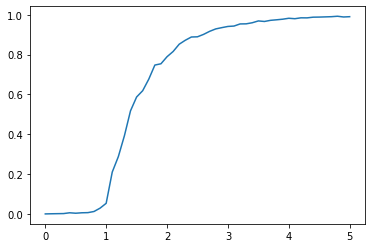

In [129]:
plt.plot(kvals,N_G1)

In [130]:
kvals = np.linspace(0,5,51)
N2 = len(G2.nodes())
N_G2 = []

for k in kvals:
    G2 = erdos_renyi_graph(N2, k/N2)
    Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
    N_G2.append(len(Gcc[0])/N2)


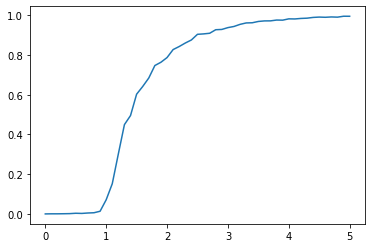

In [131]:
plt.plot(kvals,N_G2)